In [133]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [134]:

# Read in the csv as a DataFrame
office_df = pd.read_csv('the_office_series.csv')
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [135]:
office_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,188.0,93.500000,54.415071,0.00,46.75,93.500,140.250,187.00
Season,188.0,5.468085,2.386245,1.00,3.00,6.000,7.250,9.00
Ratings,188.0,8.237234,0.589930,6.60,7.80,8.200,8.600,9.80
Votes,188.0,2838.228723,1063.165290,1832.00,2187.75,2614.000,3144.250,10515.00
Viewership,188.0,7.246330,2.066012,3.25,5.99,7.535,8.425,22.91
Duration,188.0,27.053191,6.937254,19.00,22.00,23.000,30.000,60.00


In [136]:
#create normalize the rating Function
def normalizeFunc(col):
    minValue = min(col)
    maxValue = max(col)
    return [*map(lambda x: (x - minValue)/(maxValue - minValue), col)]
#call normaize Function
office_df['scaled_ratings'] = normalizeFunc(office_df['Ratings'])

In [152]:
office_df['scaled_ratings']

0      0.28125
1      0.53125
2      0.37500
3      0.46875
4      0.56250
        ...   
183    0.43750
184    0.43750
185    0.75000
186    0.90625
187    1.00000
Name: scaled_ratings, Length: 188, dtype: float64

In [137]:

# Initiatlize two empty lists
cols = []
sizes = []

# Iterate through the DataFrame, and assign colors based on the rating
for ind, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')


In [138]:

#since we have guest stars null values
guest=office_df.GuestStars.isnull()
has_guest=[False if i else True for i in guest]

office_df['has_guests']=has_guest
office_df


,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,scaled_ratings,has_guests
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,0.46875,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,0.56250,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling,0.43750,False
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,0.43750,False
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,0.75000,True
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester,0.90625,False


In [139]:
office_df.Date = pd.to_datetime(office_df.Date)
office_df=office_df.rename(columns = {'Unnamed: 0': 'episode_number'})
office_df

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,scaled_ratings,has_guests
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,0.53125,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,0.37500,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,0.46875,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,0.56250,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,0.43750,False
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,0.43750,False
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,0.75000,True
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,0.90625,False


In [140]:

len(sizes)

0

In [141]:
# Iterate through the DataFrame, and assign a size based on whether it has guests        
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

In [142]:

# For ease of plotting, add our lists as columns to the DataFrame
office_df['colors'] = cols
office_df['sizes'] = sizes

# Split data into guest and non_guest DataFrames
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

# Set the figure size and plot style        
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

# Create the figure
fig = plt.figure()

<Figure size 792x504 with 0 Axes>

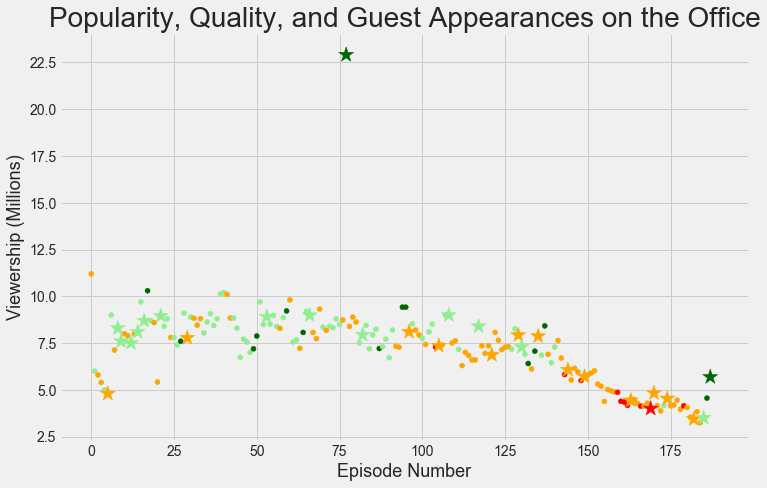

In [143]:

# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis

# Create a normal scatter plot for regular episodes
plt.scatter(x=non_guest_df.episode_number, y=non_guest_df.Viewership, \
                 # Assign our color list as the colors and set marker and size
                 c=non_guest_df['colors'], s=25)

# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df.episode_number, y=guest_df.Viewership, \
                 # Assign our color list as the colors and set marker and size
                 c=guest_df['colors'], marker='*', s=250)

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize=28)

# Create an x-axis label
plt.xlabel("Episode Number", fontsize=18)

# Create a y-axis label
plt.ylabel("Viewership (Millions)", fontsize=18)

# Show the plot
plt.show()

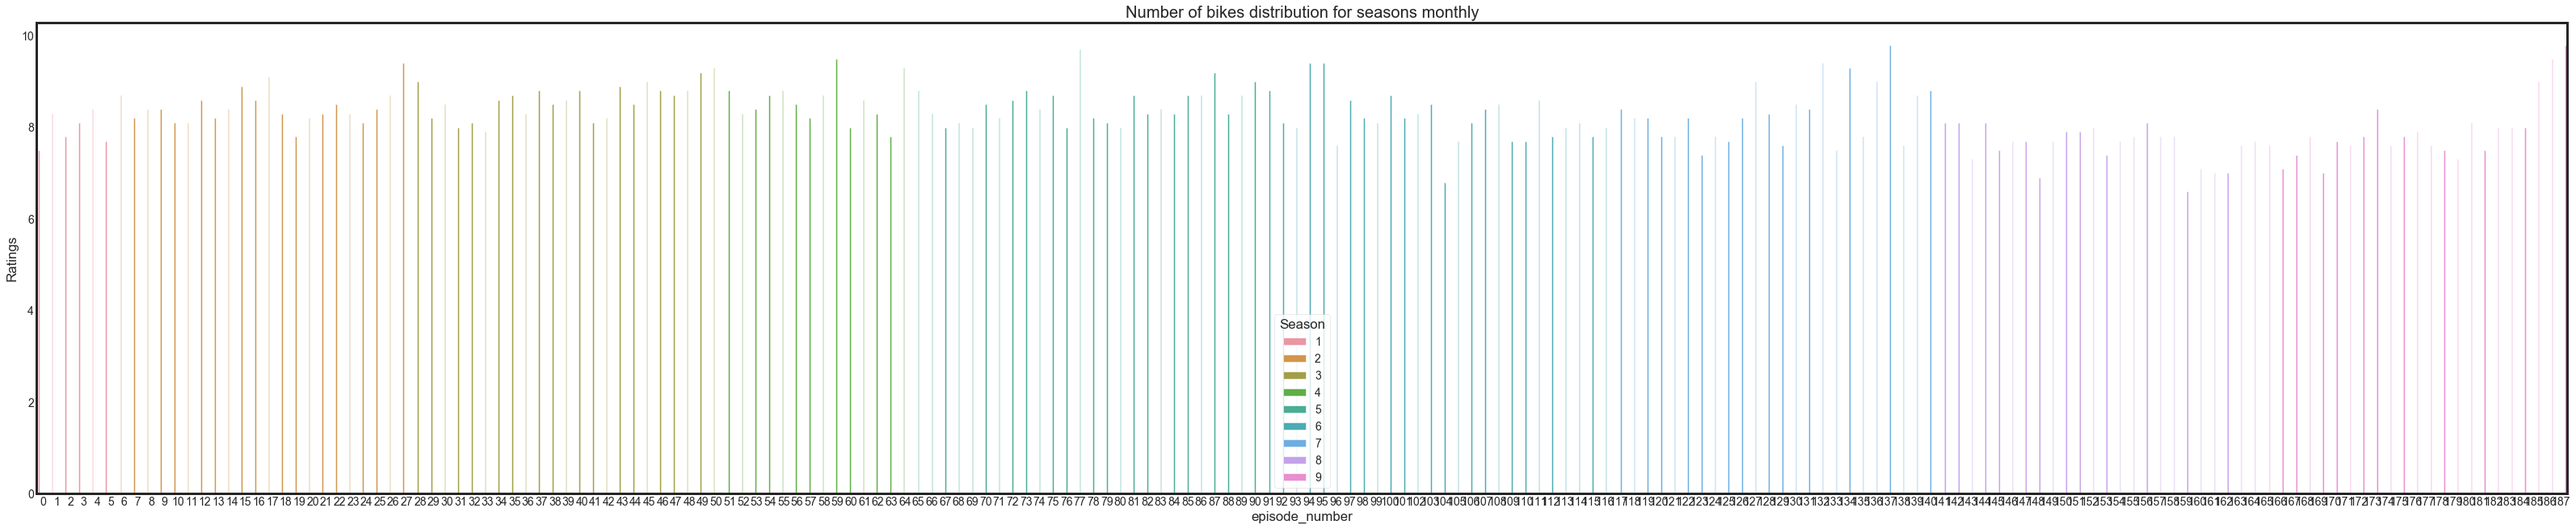

In [147]:
#distribution with ratings Vs episode number
fig,ax=plt.subplots(figsize=(50,10))
sns.set_style('white')
sns.barplot(x='episode_number',y='Ratings',data=office_df,hue='Season',ax=ax)
ax.set_title('Rating distribution for each episode')
plt.show()

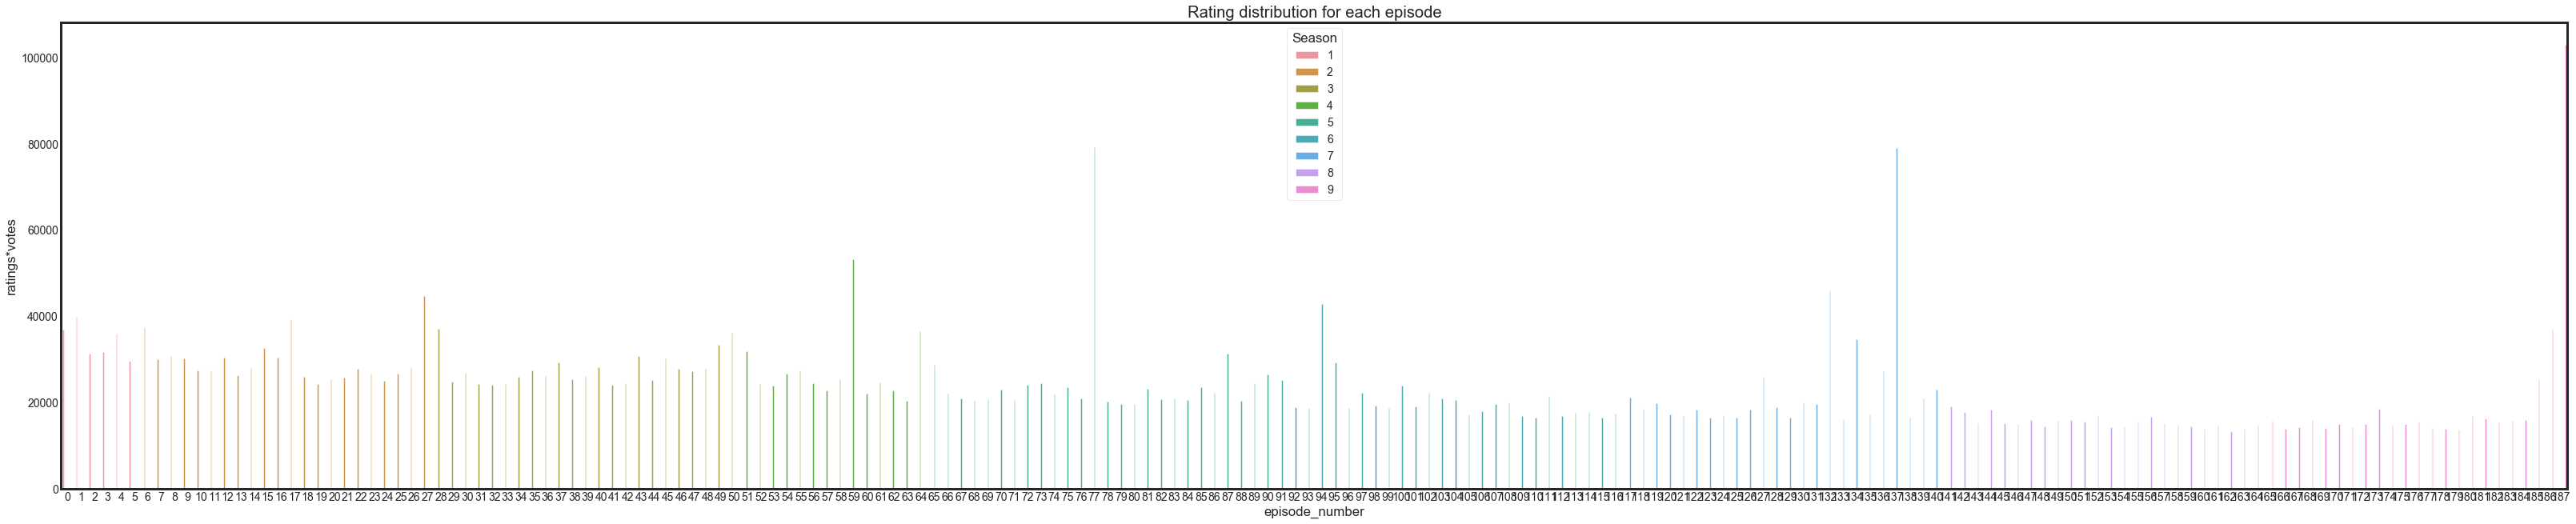

In [148]:
#distribution with ratings*votes Vs episode number
fig,ax=plt.subplots(figsize=(50,10))
sns.set_style('white')
office_df['ratings*votes'] = office_df['Ratings'] * office_df['Votes']
sns.barplot(x='episode_number',y='ratings*votes',data=office_df,hue='Season',ax=ax)
ax.set_title('Rating and votes distribution for each episode')
plt.show()

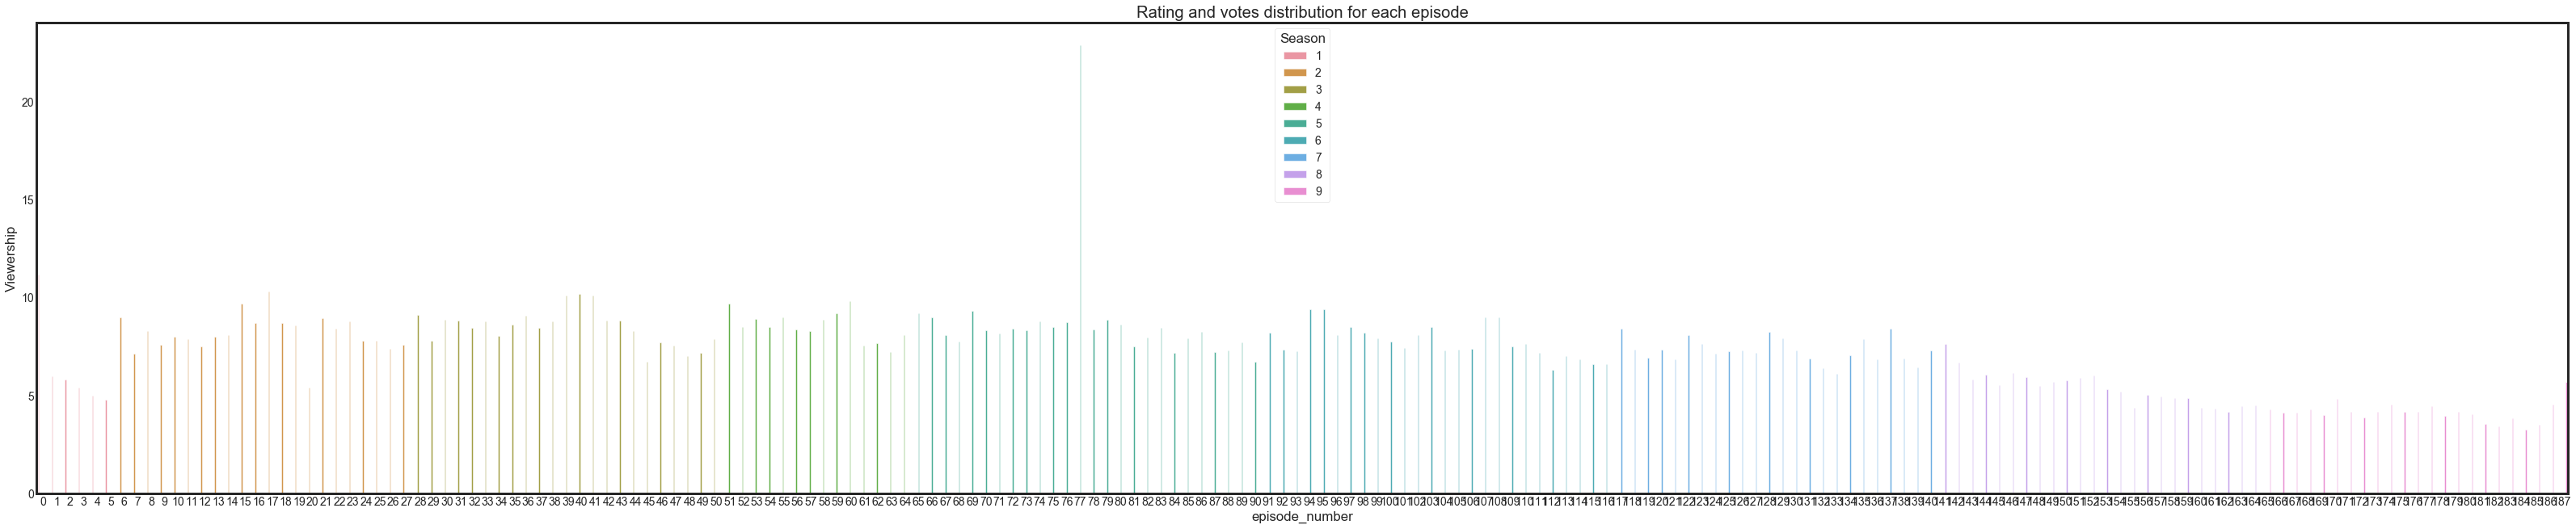

In [149]:
#distribution with ratings Vs episode number
fig,ax=plt.subplots(figsize=(50,10))
sns.set_style('white')
sns.barplot(x='episode_number',y='Viewership',data=office_df,hue='Season',ax=ax)
ax.set_title('Viewership distribution for each episode')
plt.show()

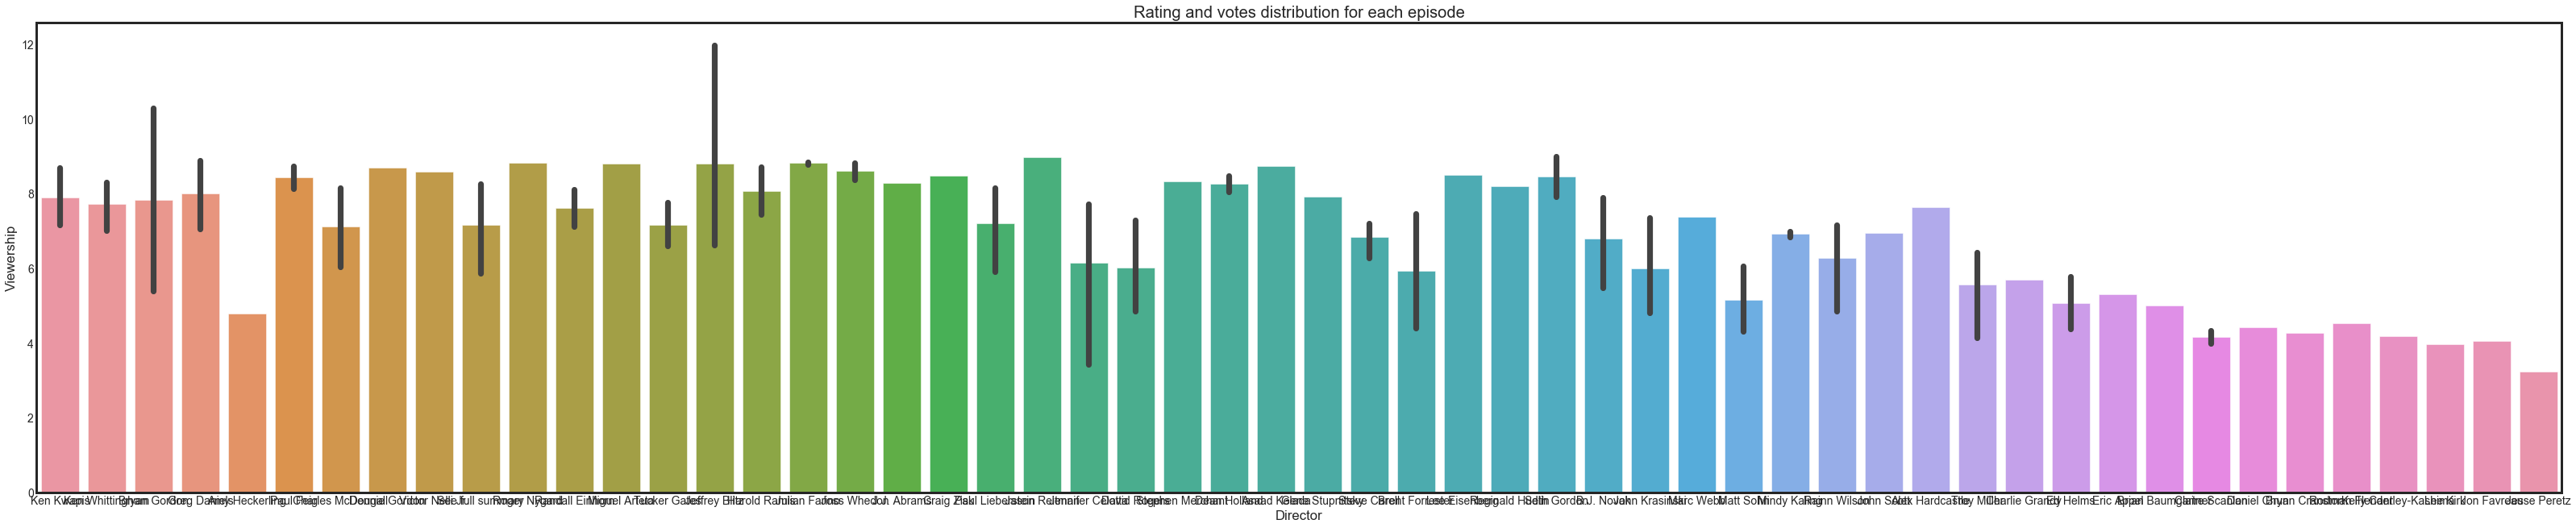

In [151]:
#distribution with ratings Vs episode number
fig,ax=plt.subplots(figsize=(50,10))
sns.set_style('white')
sns.barplot(x='Director',y='Viewership',data=office_df,ax=ax)
ax.set_title('Rating and votes distribution for each episode')
plt.show()